In [92]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# Gaussian Mixture Model

In [93]:
df = pd.read_excel('boston housing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [94]:
features= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PT','B','LSTAT','MV']


In [95]:
X= df[features]

In [96]:
z= StandardScaler()

In [97]:
X[features] = z.fit_transform(X)

In [98]:
EM = GaussianMixture(n_components= 2)
EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [99]:
cluster= EM.predict(X)  
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [100]:
EM.predict_proba(X)


array([[0.00000000e+00, 1.00000000e+00],
       [8.81730219e-34, 1.00000000e+00],
       [4.36926508e-31, 1.00000000e+00],
       ...,
       [3.45722030e-13, 1.00000000e+00],
       [2.74146476e-13, 1.00000000e+00],
       [1.50999776e-14, 1.00000000e+00]])

In [101]:
print("SILHOUETTE K=2 : ", silhouette_score(X,cluster))

SILHOUETTE K=2 :  0.3419056488913232


In [102]:
X["cluster"]= cluster

D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


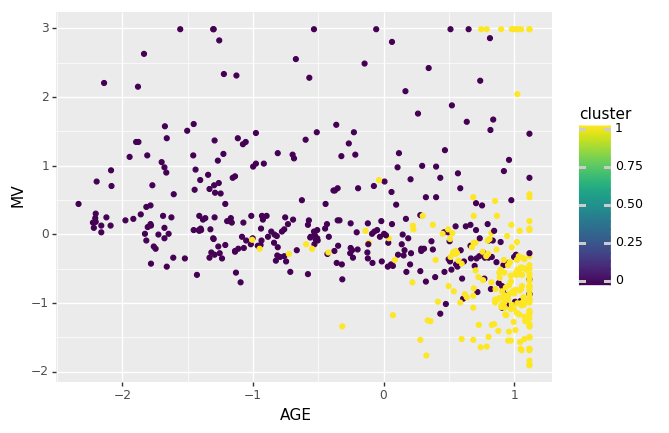

<ggplot: (-9223371914155499625)>

In [55]:
(ggplot(X,aes(x="AGE",y="MV", color="cluster")) + geom_point())


D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


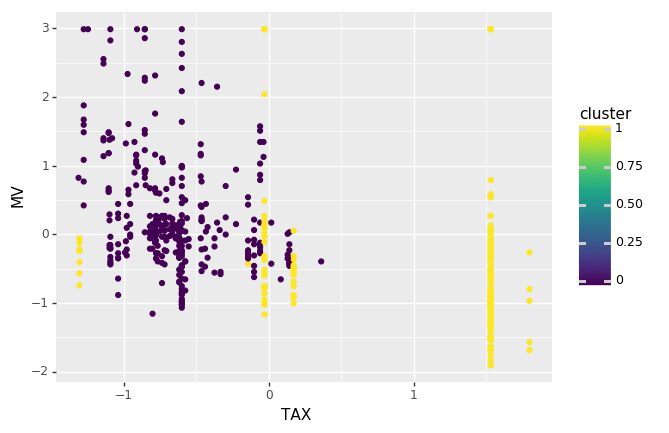

<ggplot: (-9223371914155627022)>

In [56]:
(ggplot(X,aes(x="TAX",y="MV", color="cluster")) + geom_point())

D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


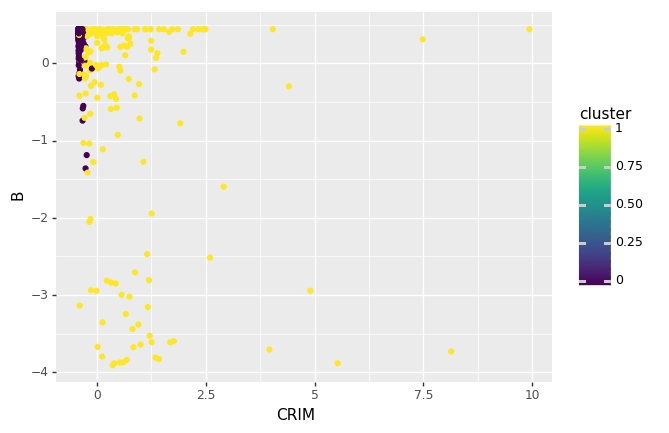

<ggplot: (122699090454)>

In [57]:
(ggplot(X,aes(x="CRIM",y="B", color="cluster")) + geom_point())


# Gaussians with no_of_cluster = 3

In [61]:
EM = GaussianMixture(n_components= 3)
EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [62]:
cluster= EM.predict(X)  


In [63]:
print("SILHOUETTE for k=3 : ", silhouette_score(X,cluster))

SILHOUETTE for k=3 :  0.1620285574829811


D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


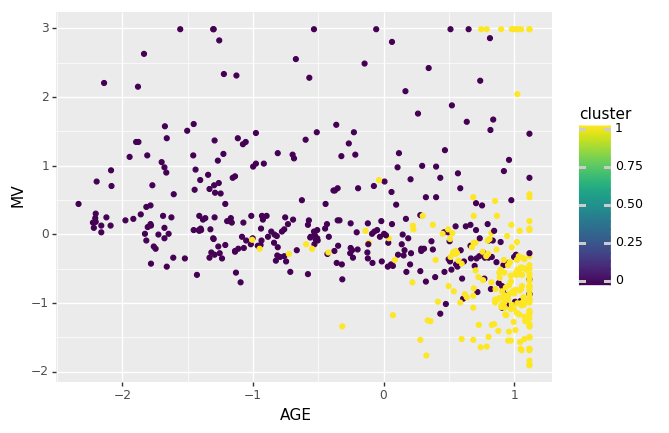

<ggplot: (122699168488)>

In [64]:
(ggplot(X,aes(x="AGE",y="MV", color="cluster")) + geom_point())


D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


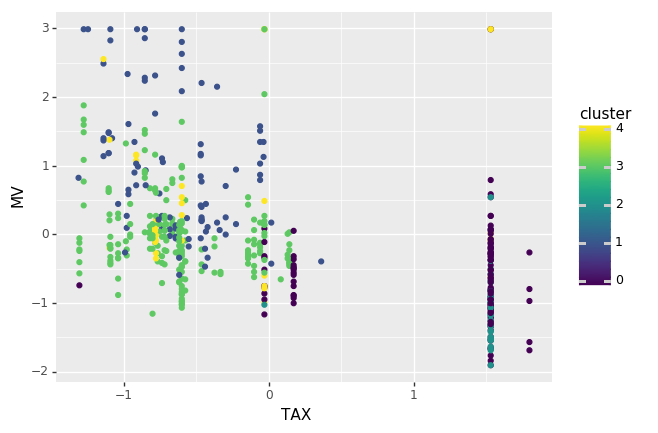

<ggplot: (150845553037)>

In [36]:
(ggplot(X,aes(x="TAX",y="MV", color="cluster")) + geom_point())

# Gaussians no_of_cluster = 4

In [65]:
EM = GaussianMixture(n_components= 4)
EM.fit(X)
cluster= EM.predict(X)  
print("SILHOUETTE : ", silhouette_score(X,cluster))



SILHOUETTE :  0.15163272755111434


D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


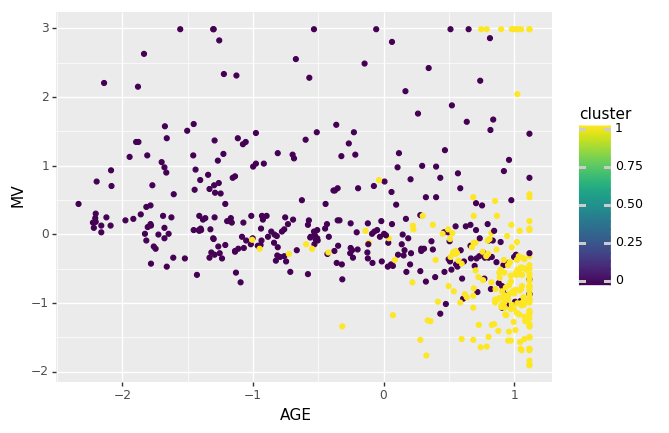

<ggplot: (122699257832)>

In [66]:
(ggplot(X,aes(x="AGE",y="MV", color="cluster")) + geom_point())


D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


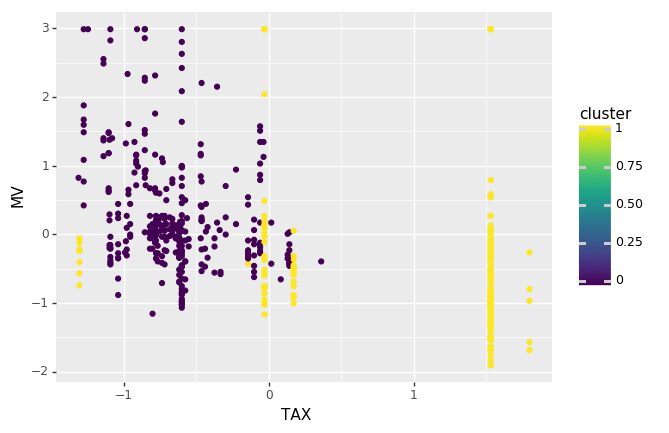

<ggplot: (122699135429)>

In [67]:
(ggplot(X,aes(x="TAX",y="MV", color="cluster")) + geom_point())

# Gaussians no_of_cluster= 5

In [68]:
EM = GaussianMixture(n_components= 5)
EM.fit(X)
cluster= EM.predict(X)  #hard code
print("SILHOUETTE : ", silhouette_score(X,cluster))



SILHOUETTE :  0.2037201410145228


D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


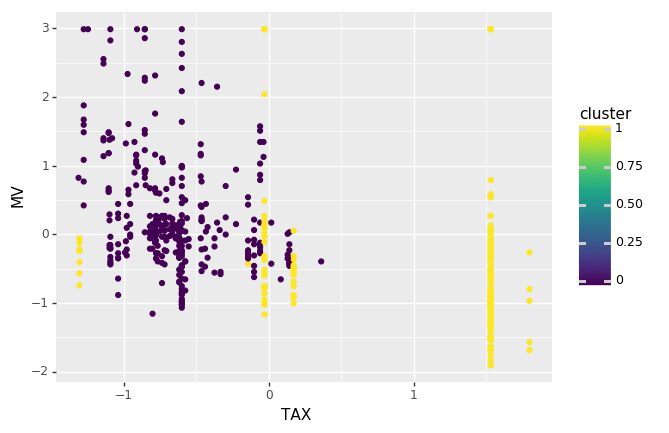

<ggplot: (-9223371914157910128)>

In [20]:
(ggplot(X,aes(x="TAX",y="MV", color="cluster")) + geom_point())

D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


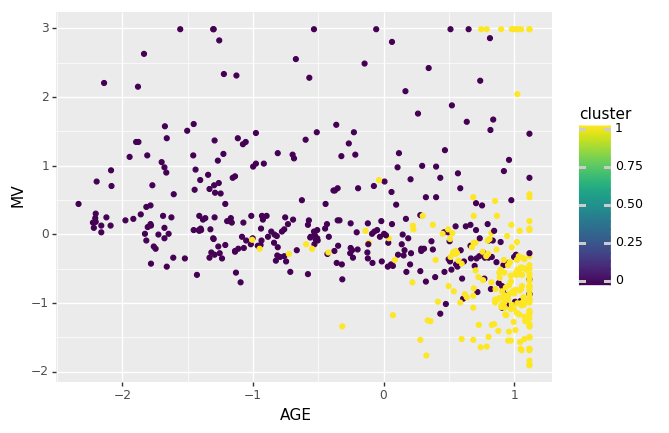

<ggplot: (-9223371914157915872)>

In [21]:
(ggplot(X,aes(x="AGE",y="MV", color="cluster")) + geom_point())


# KMeans on Boston housing Data

In [33]:
df = pd.read_excel('boston housing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [34]:
features= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PT','B','LSTAT','MV']
X= df[features]
z= StandardScaler()
X[features] = z.fit_transform(X)

D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


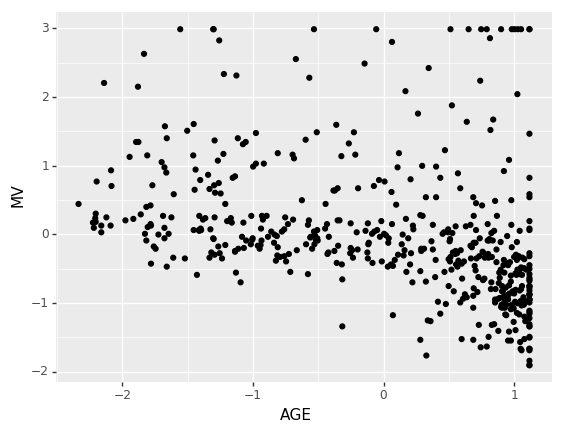

<ggplot: (122697991565)>

In [35]:
(ggplot(X,aes(x="AGE",y="MV")) + geom_point())


D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


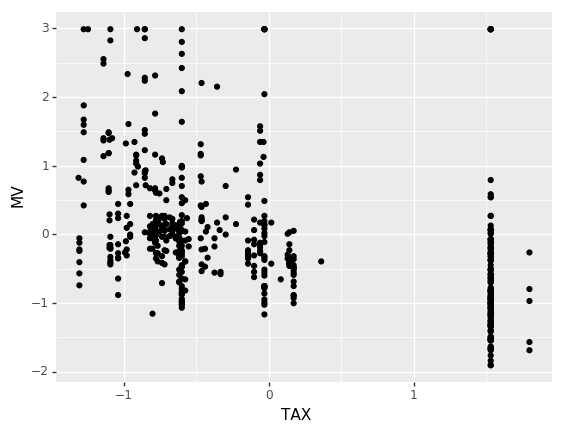

<ggplot: (122697728681)>

In [36]:
(ggplot(X,aes(x="TAX",y="MV")) + geom_point())

In [37]:
km =KMeans(n_clusters = 2)
km.fit(X)

membership =km.predict(X)

X["cluster"] = membership

In [38]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV,cluster
0,-0.419782,0.284830,-1.287910,-0.272599,-0.144218,0.413672,-0.120014,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439,-0.101524,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727,1.324247,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228576,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,1


D:\anaconda\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


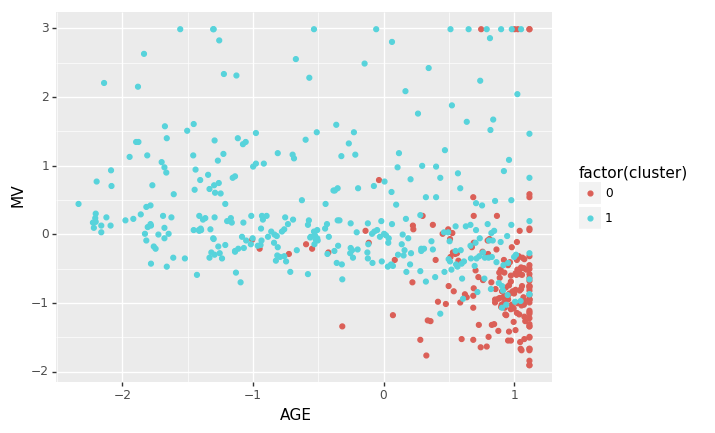

<ggplot: (-9223371914169060783)>

In [39]:
(ggplot(X,aes(x="AGE",y="MV", color ="factor(cluster)")) + geom_point())


D:\anaconda\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


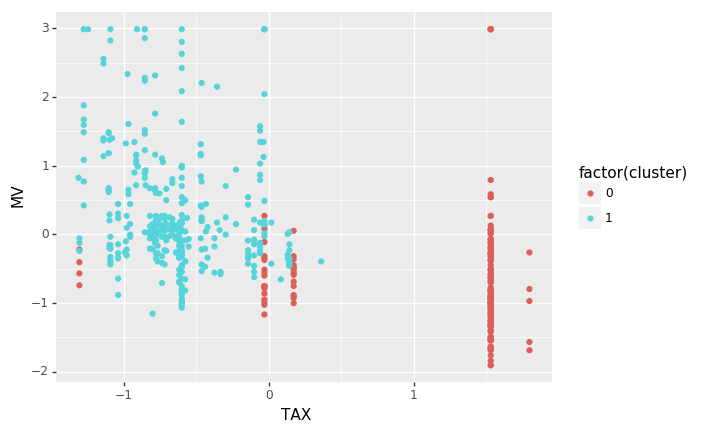

<ggplot: (-9223371914165215530)>

In [40]:
(ggplot(X,aes(x="TAX",y="MV", color ="factor(cluster)")) + geom_point())


In [41]:
silhouette_score(X[features],membership)

0.35010702301945096

#            # KMeans No of cluster =3

In [42]:
km =KMeans(n_clusters = 3)
km.fit(X)

membership =km.predict(X)

X["cluster"] = membership


In [43]:
silhouette_score(X[features],membership)

0.25046793960838754

D:\anaconda\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


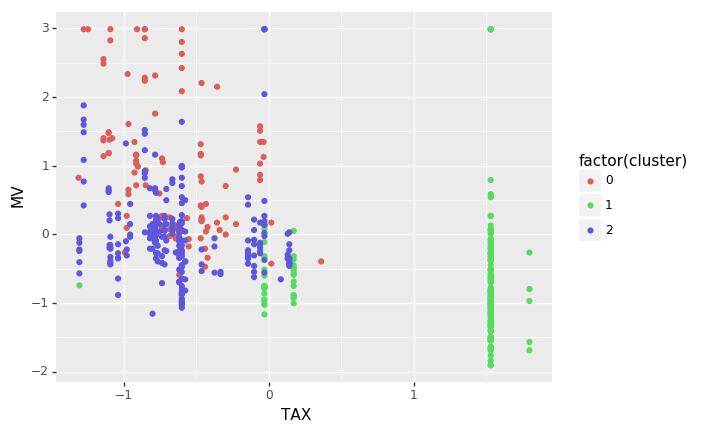

<ggplot: (-9223371886009627262)>

In [25]:
(ggplot(X,aes(x="TAX",y="MV", color ="factor(cluster)")) + geom_point())


# KMeans No of cluster =4 


In [26]:
km =KMeans(n_clusters = 4)
km.fit(X)

membership =km.predict(X)

X["cluster"] = membership

In [27]:
silhouette_score(X[features],membership)

0.2702207948813646

D:\anaconda\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


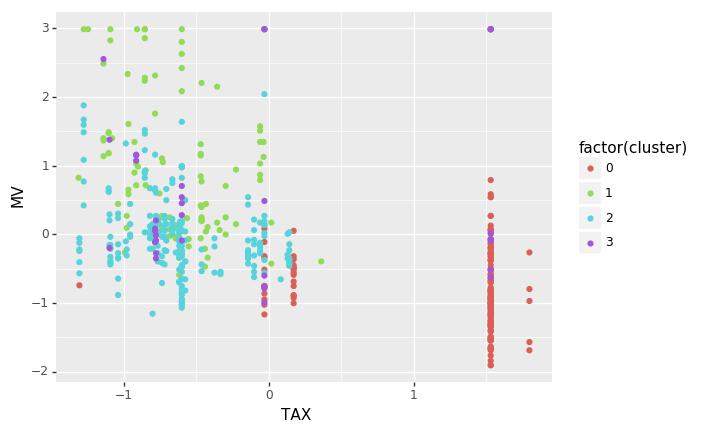

<ggplot: (-9223371886009462791)>

In [28]:
(ggplot(X,aes(x="TAX",y="MV", color ="factor(cluster)")) + geom_point())


# KMeans with K=5

In [29]:
km =KMeans(n_clusters = 5)
km.fit(X)

membership =km.predict(X)

X["cluster"] = membership
silhouette_score(X[features],membership)

0.2687628793715403

D:\anaconda\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
D:\anaconda\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
D:\anaconda\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


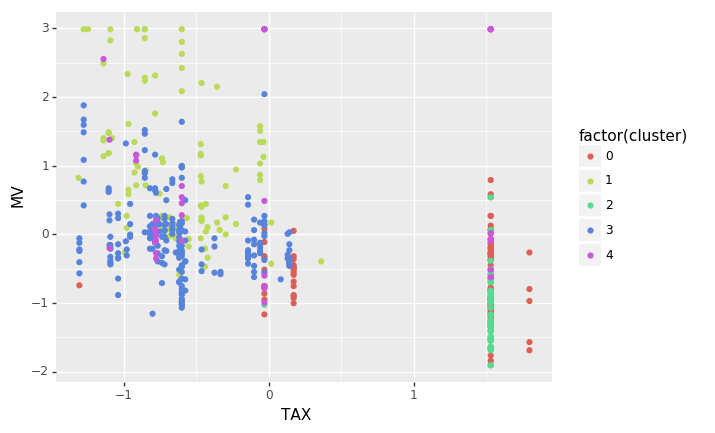

<ggplot: (-9223371886010286567)>

In [30]:
(ggplot(X,aes(x="TAX",y="MV", color ="factor(cluster)")) + geom_point())
